In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans

# For checking Hopkins Stats to verify if clustering can be performed
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# For Silhoutte Score
from sklearn.metrics import silhouette_score

## 1. Read and Understand Data

In [2]:
india= pd.read_excel('Main.xlsx')

In [3]:
india.head()

,Area Name,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,State - JAMMU & KASHMIR,3378518,385463,12541302,26.939133,3.073549
1,State - HIMACHAL PRADESH,963742,267936,6864602,14.039299,3.903154
2,State - PUNJAB,4886265,979525,27743338,17.612390,3.530667
3,State - CHANDIGARH,175200,91276,1055450,16.599555,8.648065
4,State - UTTARAKHAND,1929236,525301,10086292,19.127307,5.208069


In [4]:
india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area Name                    35 non-null     object 
 1   Illiterate                   35 non-null     int64  
 2   Graduate & above             35 non-null     int64  
 3   Total - Population           35 non-null     int64  
 4   Percentage Illiterate        35 non-null     float64
 5   Percentage Graduate & above  35 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ KB


In [5]:
india.describe()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
count,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,35.000000
mean,7.678103e+06,1.075194e+06,3.459586e+07,20.101981,3.483161
std,1.133721e+07,1.399289e+06,4.445234e+07,5.762072,1.661141
min,8.337000e+03,1.482000e+03,6.447300e+04,11.176535,1.454525
25%,3.098615e+05,5.948800e+04,1.421136e+06,16.076337,2.333452
50%,3.378518e+06,5.253010e+05,1.678794e+07,19.405567,3.073549
75%,1.036886e+07,1.596484e+06,6.076749e+07,24.170387,4.106503
max,5.422576e+07,5.741485e+06,1.998123e+08,33.460356,8.648065


EDA is not perfomed as the Data is the India leteracy Data is clean Data

In [6]:
scaler=StandardScaler()
df=scaler.fit_transform(india[['Illiterate','Graduate & above','Total - Population','Percentage Illiterate','Percentage Graduate & above']])
df=pd.DataFrame(df)
df.columns=['Illiterate','Graduate & above','Total - Population','Percentage Illiterate','Percentage Graduate & above']
df.head()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,-0.384782,-0.500111,-0.503383,1.203902,-0.250185
1,-0.600888,-0.585328,-0.632950,-1.067532,0.256526
2,-0.249850,-0.069368,-0.156405,-0.438373,0.029016
3,-0.671456,-0.713421,-0.765541,-0.616716,3.154645
4,-0.514483,-0.398717,-0.559417,-0.171623,1.053547


In [7]:
df.shape[1]

5

In [8]:
# Hopkins Statistic

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [9]:
sample(range(0,len(df), 1),3)

[3, 17, 33]

In [10]:
uniform(np.amin(df,axis=0),np.amax(df,axis=0),5).reshape(1, -1)

array([[ 0.92495381,  2.01498002, -0.40270533,  2.22804818,  2.27727064]])

In [11]:
hopkins(df)

0.7933840075910438

Hopkins score of 0.8 is a good score for clustering

### Finding Optimal number of clusters

In [12]:
num_clusters=list(range(2,6))
num_clusters

[2, 3, 4, 5]

In [13]:
# elbow-curve/SSD and Silhoutte Analysis

ssd=[]
silhoute=[]

for i in num_clusters:
    kmeans=KMeans(n_clusters=i,max_iter=50).fit(df)
    
    ssd.append(kmeans.inertia_)
    silhoute.append("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_score(df,kmeans.labels_)))

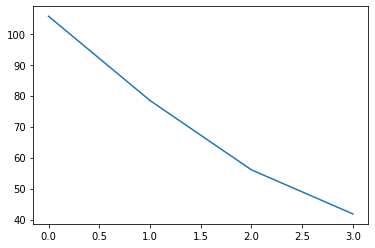

In [14]:
plt.plot(ssd)
plt.show()

In [15]:
silhoute

['For n_clusters=2, the silhouette score is 0.38913889968693116',
 'For n_clusters=3, the silhouette score is 0.29360956319988357',
 'For n_clusters=4, the silhouette score is 0.313798638027045',
 'For n_clusters=5, the silhouette score is 0.3292583493850758']

From above we se that the elbow is formed at cluster # 3 and this is confirmed by silhoutte score too . We will use 3 clusters

In [16]:
kmeans=KMeans(n_clusters=3,max_iter=50).fit(df)

In [17]:
kmeans.labels_

array([0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2])

In [18]:
india['cluster']=kmeans.labels_
india.head()

,Area Name,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above,cluster
0,State - JAMMU & KASHMIR,3378518,385463,12541302,26.939133,3.073549,0
1,State - HIMACHAL PRADESH,963742,267936,6864602,14.039299,3.903154,2
2,State - PUNJAB,4886265,979525,27743338,17.612390,3.530667,2
3,State - CHANDIGARH,175200,91276,1055450,16.599555,8.648065,2
4,State - UTTARAKHAND,1929236,525301,10086292,19.127307,5.208069,2


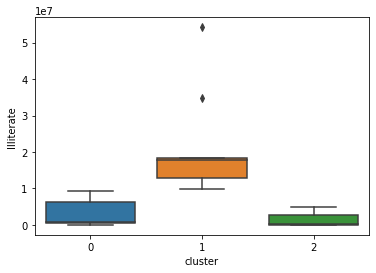

In [19]:
sns.boxplot(x='cluster', y='Illiterate',  data=india)
plt.show()

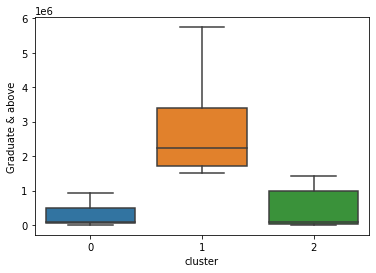

In [20]:
sns.boxplot(x='cluster', y='Graduate & above',  data=india)
plt.show()

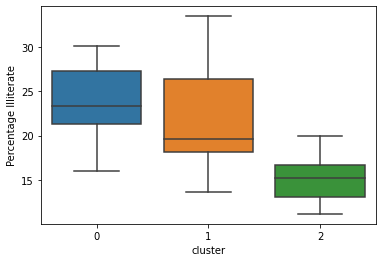

In [21]:
sns.boxplot(x='cluster', y='Percentage Illiterate',  data=india)
plt.show()

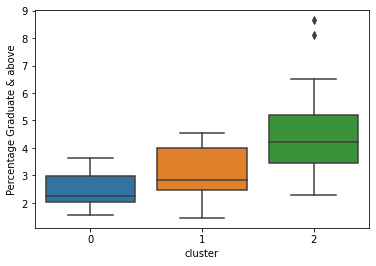

In [22]:
sns.boxplot(x='cluster', y='Percentage Graduate & above',  data=india)
plt.show()

Cluster 0 has the most literacy %. Cluster 1 has the highest mix of literate and illetrate population. cluster 2 has high illetracy so lot of funding needed for this group of states

## Using Hierarchical Clustering

In [24]:
# Hirerchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

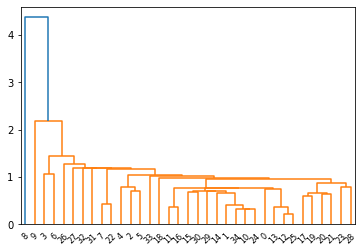

In [25]:
mergings= linkage(df, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

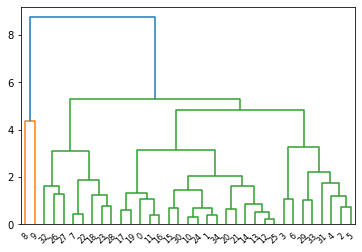

In [26]:
mergings= linkage(df, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

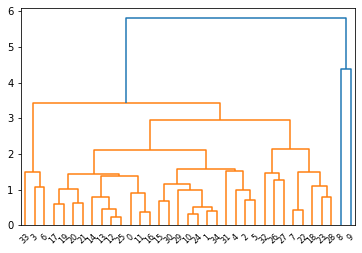

In [27]:
mergings= linkage(df, method='average',metric='euclidean')
dendrogram(mergings)
plt.show()